## Automatizando a transformação dos arquivos .txt.
* Juntando todos os testes gerados em um dataframe e disponibilizando a planilha em excel através do arquivo csv gerado pelo código.


In [1]:
import pandas as pd
import os 

pasta = r'C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads'


dataframes = []

for arquivo in os.listdir(pasta):
    if arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(pasta, arquivo)
        print(f'Lendo arquivo: {caminho_arquivo}')

        df_temp = pd.read_csv(caminho_arquivo, delimiter='\t')

        df_temp['NumThreads'] = df_temp['NumThreads'].astype(int)
    
        df_ordenado = df_temp.sort_values(by='NumThreads', ascending = True)   

        dataframes.append(df_ordenado)


df_final = pd.concat(dataframes, ignore_index= True)
df_final = df_final.sort_values(by='NumThreads', ascending=True).reset_index(drop=True)

print(df_final.head())

df_final.to_excel('dados_consolidados.xlsx', index=False)

print("Todos os arquivos foram processados e salvos em 'dados_consolidados.xlsx'.")

Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt1-st1734444745261.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt10-st1734445110412.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt100-st1734445481995.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt1000-st1734460511556.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt12-st1734445148500.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt14-st1734445161875.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark NumerosPrimos Threads\measurements-mn110000-nt16-st1734445180277.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabal

## Apresentando o dataframe final dos testes alterando o número de Threads.

In [5]:
df_final.rename(columns={'StartTime' : 'TempoInicial', 'ElapsedTime' : 'TempoDecorrido', 'MeanUtilization' : 'UtilizacaoMedia'}, inplace=True)
df_final

,NumThreads,NumeroMaximo,TempoInicial,TempoDecorrido,UtilizacaoMedia
0,1,110000,1734444745261,29593,0.170290
1,2,110000,1734444780690,17084,0.282826
2,3,110000,1734444806843,10940,0.401686
3,4,110000,1734444876569,7618,0.535848
4,5,110000,1734444898025,9034,0.662196
5,6,110000,1734444919146,8657,0.793764
6,7,110000,1734444960738,7316,0.888858
7,8,110000,1734444977065,7143,0.995215
8,9,110000,1734445093659,7611,0.961528
9,10,110000,1734445110412,7263,0.932883


# Como o aumento da quantidade de threads afeta a utilização de CPU.

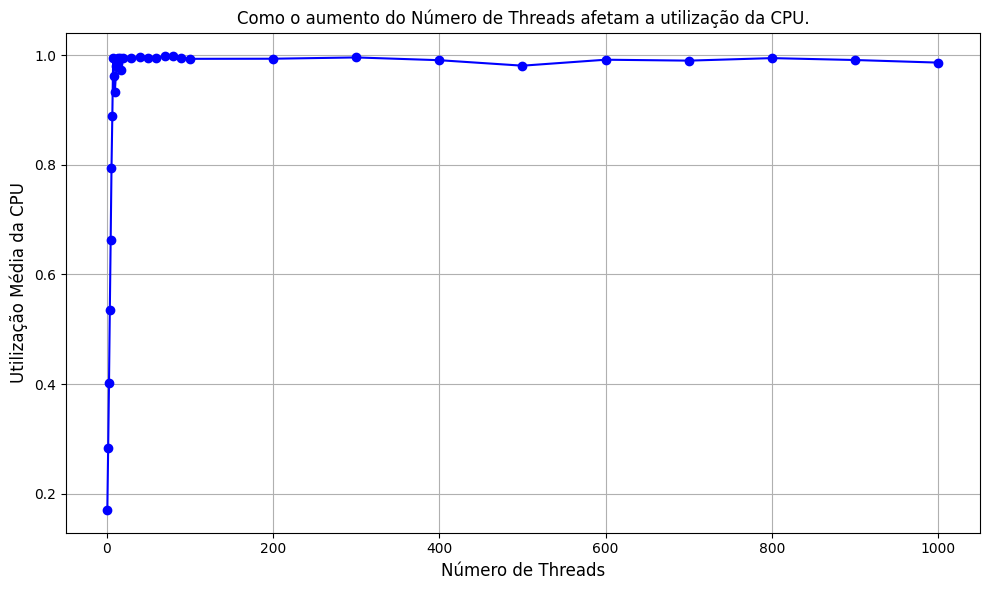

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


threads_utilizacao = df_final.groupby("NumThreads")[("UtilizacaoMedia")].mean()
ponto_saturacao = threads_utilizacao[threads_utilizacao >= 0.99].index[0]

plt.figure(figsize=(10, 6))
plt.plot(threads_utilizacao.index, threads_utilizacao.values, marker = 'o', color = 'blue')
plt.title('Como o aumento do Número de Threads afetam a utilização da CPU.')
plt.xlabel('Número de Threads', fontsize = 12)
plt.ylabel('Utilização Média da CPU', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

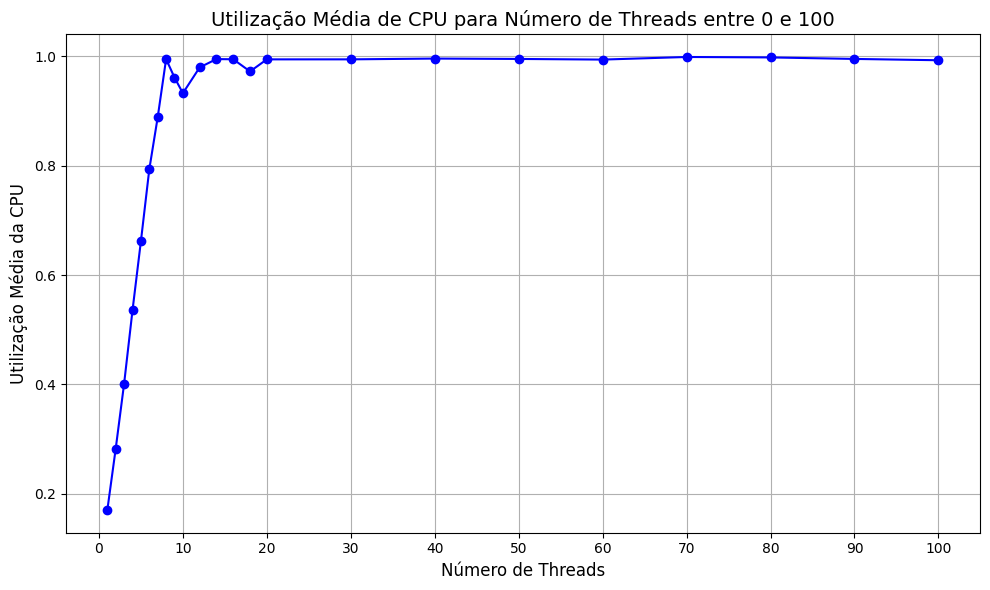

In [7]:
df_filtrado = df_final[df_final['NumThreads'] <= 100]
threads_utilizacao = df_filtrado.groupby('NumThreads')['UtilizacaoMedia'].mean()

plt.figure(figsize=(10, 6))
plt.plot(threads_utilizacao.index, threads_utilizacao.values, marker='o', linestyle='-', color='blue')
plt.title('Utilização Média de CPU para Número de Threads entre 0 e 100', fontsize=14)
plt.xlabel('Número de Threads', fontsize=12)
plt.ylabel('Utilização Média da CPU', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.tight_layout()
plt.show()

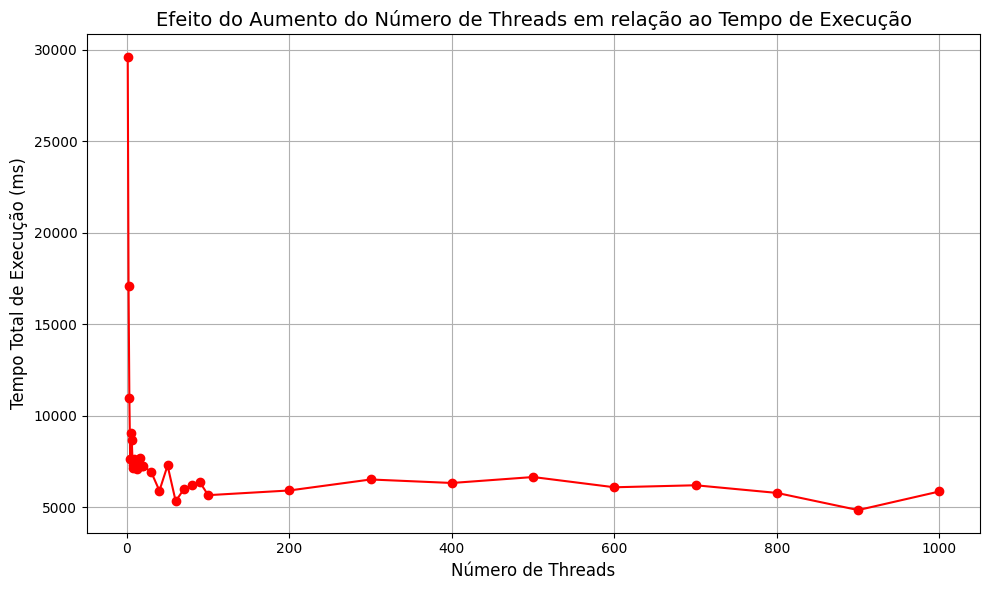

In [12]:
threads_tempo_execucao = df_final.groupby('NumThreads')[('TempoDecorrido')].mean()

plt.figure(figsize= (10, 6))
plt.plot(threads_tempo_execucao.index, threads_tempo_execucao.values, marker='o', linestyle='-', color='red')
plt.title('Efeito do Aumento do Número de Threads em relação ao Tempo de Execução', fontsize = 14)
plt.xlabel('Número de Threads', fontsize = 12)
plt.ylabel('Tempo Total de Execução (ms)', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()



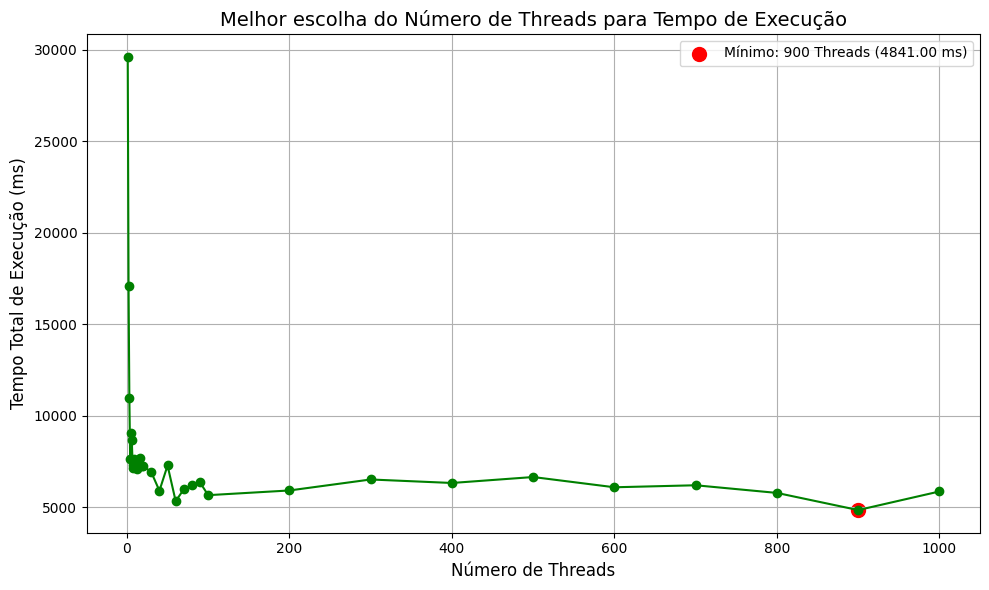

In [18]:
threads_tempo_execucao = df_final.groupby('NumThreads')[('TempoDecorrido')].mean()

min_threads = threads_tempo_execucao.idxmin()
min_tempo_decorrido = threads_tempo_execucao.min()


plt.figure(figsize= (10, 6))
plt.plot(threads_tempo_execucao.index, threads_tempo_execucao.values, marker='o', linestyle='-', color='green')
plt.scatter(min_threads, min_tempo_decorrido, color = 'red', s = 100, label = f'Mínimo: {min_threads} Threads ({min_tempo_decorrido:.2f} ms)')
plt.title('Melhor escolha do Número de Threads para Tempo de Execução', fontsize = 14)
plt.xlabel('Número de Threads', fontsize = 12)
plt.ylabel('Tempo Total de Execução (ms)', fontsize = 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
